In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Data Preparation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
         'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Load data
data = pd.read_csv(url, names=names)

In [2]:
duplicates = data.duplicated().any()
if duplicates:
    print("yes")
else:
    print("No")
    
data.drop_duplicates(inplace=True)

yes


In [3]:
# assign the incorrect values as null
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
data.replace({'?': np.nan}, inplace=True)

In [4]:
missing_values = [var for var in data.columns if data[var].isnull().mean()>0
                 and data[var].dtypes == 'O']
missing_values

['workclass', 'occupation', 'native-country']

<Axes: xlabel='workclass'>

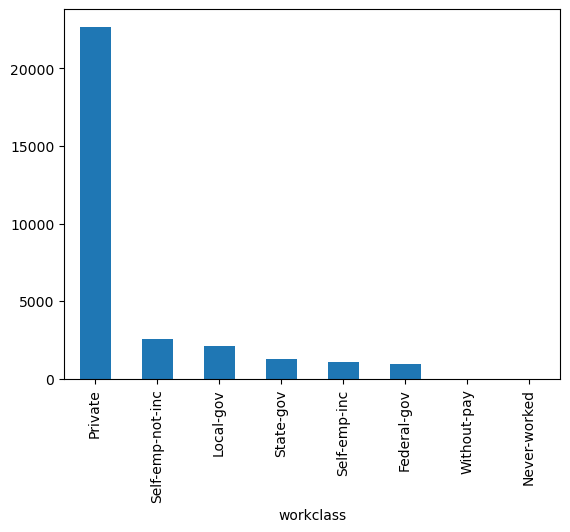

In [5]:
data['workclass'].value_counts().plot.bar()

<Axes: xlabel='workclass'>

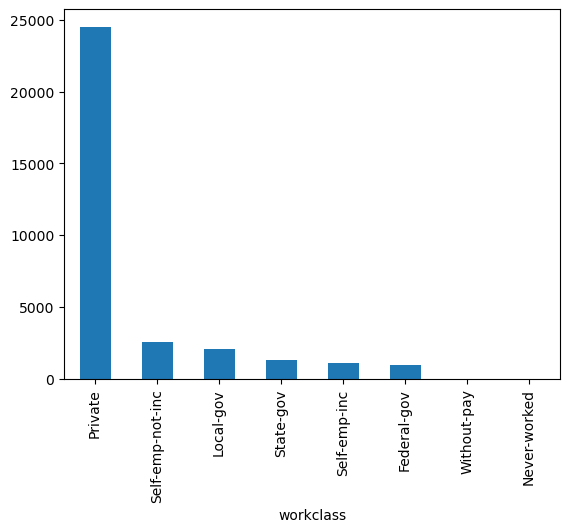

In [6]:
data['workclass'].fillna('Private', inplace=True)
data['workclass'].value_counts().plot.bar()

<Axes: xlabel='occupation'>

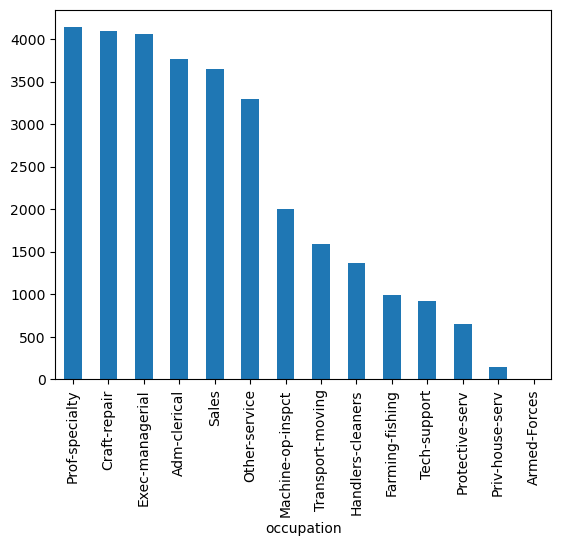

In [7]:
data['occupation'].value_counts().plot.bar()

<Axes: xlabel='occupation'>

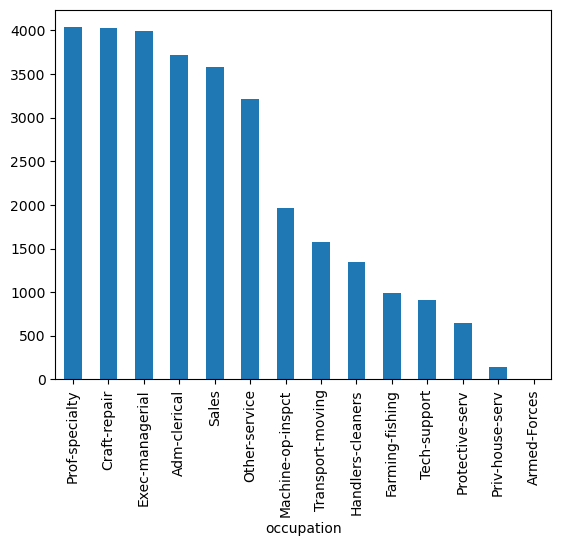

In [8]:
#data['occupation'].fillna('Prof-specialty', inplace=True)
data['occupation'] = data['occupation'].replace('?', np.nan)
data.dropna(how='any', inplace=True)
data['occupation'].value_counts().plot.bar()

<Axes: xlabel='native-country'>

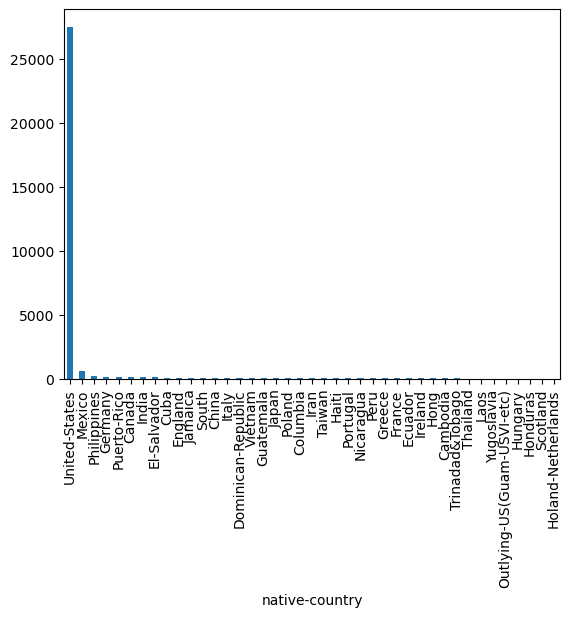

In [9]:
data['native-country'].value_counts().plot.bar()

<Axes: xlabel='native-country'>

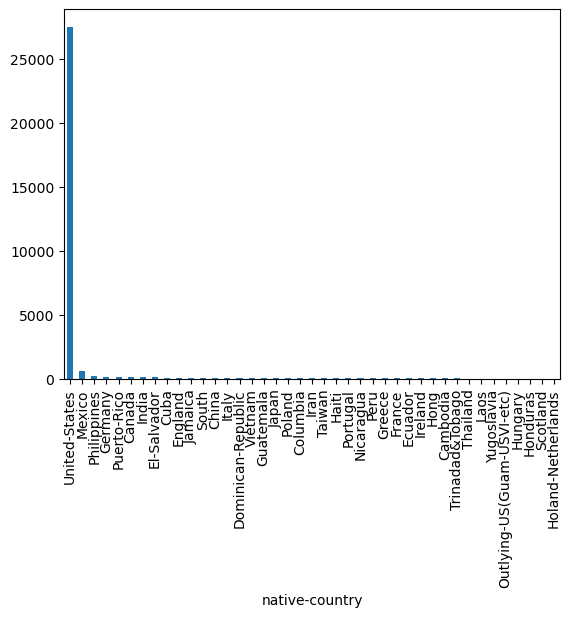

In [10]:
data['native-country'].fillna('United-States', inplace=True)
data['native-country'].value_counts().plot.bar()

In [11]:
grouped_data = data.groupby('education')['education-num'].describe()
print(grouped_data)

               count  mean  std   min   25%   50%   75%   max
education                                                    
10th           820.0   6.0  0.0   6.0   6.0   6.0   6.0   6.0
11th          1048.0   7.0  0.0   7.0   7.0   7.0   7.0   7.0
12th           377.0   8.0  0.0   8.0   8.0   8.0   8.0   8.0
1st-4th        149.0   2.0  0.0   2.0   2.0   2.0   2.0   2.0
5th-6th        287.0   3.0  0.0   3.0   3.0   3.0   3.0   3.0
7th-8th        556.0   4.0  0.0   4.0   4.0   4.0   4.0   4.0
9th            455.0   5.0  0.0   5.0   5.0   5.0   5.0   5.0
Assoc-acdm    1008.0  12.0  0.0  12.0  12.0  12.0  12.0  12.0
Assoc-voc     1307.0  11.0  0.0  11.0  11.0  11.0  11.0  11.0
Bachelors     5042.0  13.0  0.0  13.0  13.0  13.0  13.0  13.0
Doctorate      375.0  16.0  0.0  16.0  16.0  16.0  16.0  16.0
HS-grad       9834.0   9.0  0.0   9.0   9.0   9.0   9.0   9.0
Masters       1626.0  14.0  0.0  14.0  14.0  14.0  14.0  14.0
Preschool       44.0   1.0  0.0   1.0   1.0   1.0   1.0   1.0
Prof-sch

In [12]:
#handling categorical data
data.drop(columns=['education'], inplace=True)

In [13]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column)

workclass
marital-status
occupation
relationship
race
sex
native-country
income


In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [16]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,77516,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,13,2,9,5,2,0,0,0,40,4,0
